In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiple_channel_matrix_generator

In [2]:
import keras
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
df = pd.read_csv('Multiple-Labeled-HLA-A-0201.csv')

In [4]:
df_dataset = df[['sequence','label']]

In [5]:
y_data = []
for label in df_dataset['label']:
    y_data.append(label)
y_data = np.array(y_data)

In [6]:
y_data = to_categorical(y_data)

In [7]:
x_data = []
for sequence in df_dataset['sequence']:
    x_data.append(multiple_channel_matrix_generator.multiple_channel_generator(sequence))
x_data = np.array(x_data, dtype = 'float32')

In [8]:
x_data = x_data.reshape((x_data.shape[0],12,21,3))

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_data,y_data,test_size = 0.2) 

In [10]:
from keras import layers
from keras import models

In [11]:
model=models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(12,21,3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (2, 2), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))  
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.5, nesterov=True) 

In [12]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                  epochs=50, 
                  batch_size=32, 
                  verbose=1, 
                  validation_data=(x_validate, y_validate))  

Train on 9696 samples, validate on 2424 samples
Epoch 1/50
9696/9696 [==============================] - 1s 152us/step - loss: 1.7966 - accuracy: 0.2699 - val_loss: 1.4338 - val_accuracy: 0.3300
Epoch 2/50
9696/9696 [==============================] - 1s 132us/step - loss: 1.4556 - accuracy: 0.3246 - val_loss: 1.3980 - val_accuracy: 0.3606
Epoch 3/50
9696/9696 [==============================] - 1s 127us/step - loss: 1.4239 - accuracy: 0.3390 - val_loss: 1.3587 - val_accuracy: 0.3540
Epoch 4/50
9696/9696 [==============================] - 1s 127us/step - loss: 1.3950 - accuracy: 0.3523 - val_loss: 1.3710 - val_accuracy: 0.3700
Epoch 5/50
9696/9696 [==============================] - 1s 127us/step - loss: 1.3786 - accuracy: 0.3605 - val_loss: 1.3542 - val_accuracy: 0.3837
Epoch 6/50
9696/9696 [==============================] - 1s 125us/step - loss: 1.3758 - accuracy: 0.3640 - val_loss: 1.3103 - val_accuracy: 0.3956
Epoch 7/50
9696/9696 [==============================] - 1s 126us/step - loss

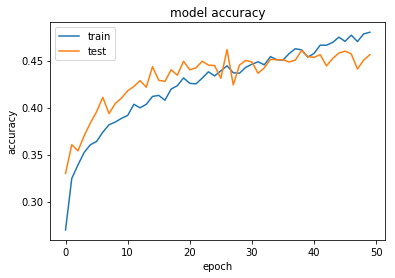

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

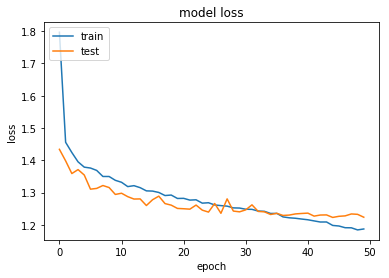

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('multi_class_CNN_model.h5')